# 🛍️ Project 2 — Customer Segmentation Analysis
**Internship:** Oasis Infobyte  
**Author:** Riya Prajapati  
**Date:** 2025-10-07  
**Dataset:** https://www.kaggle.com/code/analystoleksandra/marketing-analytics-customer-segmentation 

**Objective:**  
Perform customer segmentation for an e-commerce company using the iFood marketing dataset.  
We’ll explore the data, understand customer behavior, and create clusters to help businesses target customers more effectively.

**Steps Covered:**
1. Import and explore data  
2. Perform EDA (Exploratory Data Analysis)  
3. Visualize distributions and relationships  
4. Prepare data for clustering  
5. Apply K-Means clustering  
6. Visualize and interpret clusters  
7. Provide insights and recommendations

## 2. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

## 3. Load Dataset

In [9]:
path = r"C:\Users\as\Desktop\Projects\Oasis_Infobyte-Project_2_Customer_Segmentation_Analysis\archive (2)\ifood_df.csv"
df = pd.read_csv(path)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


## 4. Initial Data Exploration

In [12]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:\n")
df.info()

Shape: (2205, 39)

Columns:
 ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int6

In [14]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [16]:
df.isnull().sum().sort_values(ascending=False)

Income                  0
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpO

Dataset has 2205 rows and 39 columns.

There are no missing values.

## 5. Data Cleaning

In [21]:
df.isnull().sum().sum()

0

As there are no missing values hence there's no need to manage them.

## 6. Exploratory Data Analysis (EDA)

### 6.1 Distribution of Income

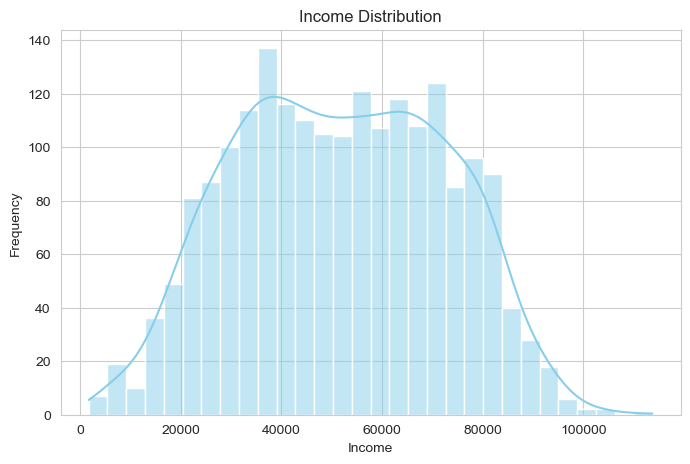

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Observation:

“Most customers earn between 20k–40k.”

“Few high-income customers may belong to premium segment.”

### 6.2 Marital Status and Education Breakdown

In [32]:
# Convert dummy variables back into readable labels
marital_cols = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
education_cols = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

# Get the column names where the value is 1
df['Marital_Status'] = df[marital_cols].idxmax(axis=1).str.replace('marital_', '')
df['Education'] = df[education_cols].idxmax(axis=1).str.replace('education_', '')

In [34]:
df[['Marital_Status', 'Education']].head()

,Marital_Status,Education
0,Single,Graduation
1,Single,Graduation
2,Together,Graduation
3,Together,Graduation
4,Married,PhD


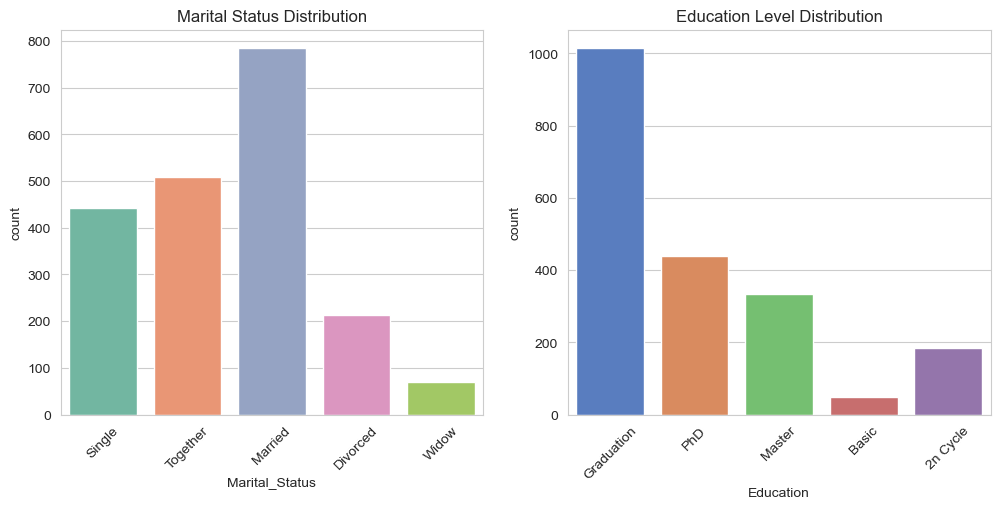

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='Marital_Status', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Marital Status Distribution')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='Education', data=df, ax=axes[1], palette='muted')
axes[1].set_title('Education Level Distribution')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

<Axes: xlabel='Marital_Status', ylabel='count'>

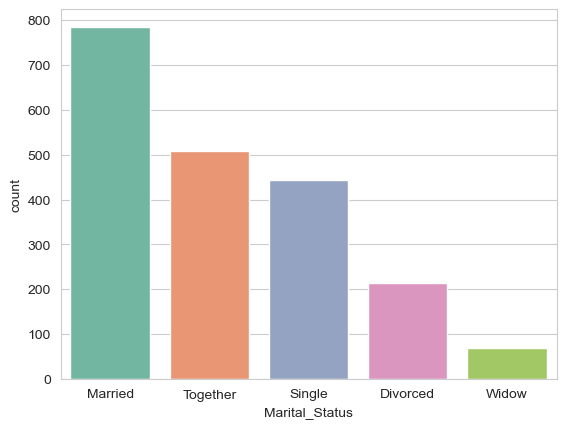

In [38]:
sns.countplot(
    x='Marital_Status',
    data=df,
    order=df['Marital_Status'].value_counts().index,
    palette='Set2'
)

Observation:

“Majority of customers are Married.”

“Most customers have Graduation or Master’s level education.”

### 6.3 Spending on Each Product Category

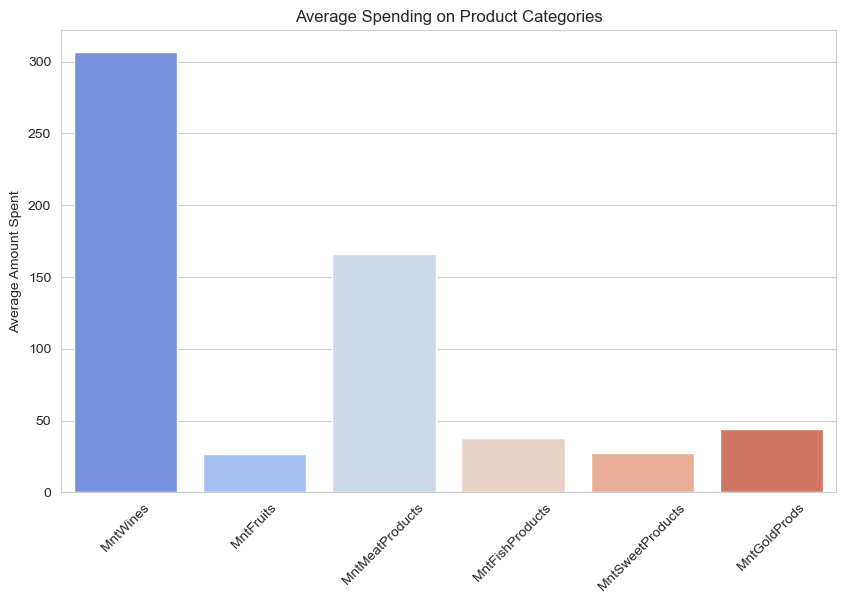

In [41]:
spend_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

plt.figure(figsize=(10,6))
sns.barplot(x=spend_cols, y=df[spend_cols].mean().values, palette='coolwarm')
plt.title("Average Spending on Product Categories")
plt.ylabel("Average Amount Spent")
plt.xticks(rotation=45)
plt.show()

Observation:

“Wines and Meat products have the highest average spending.”

“Sweet and Gold products are lower but consistent.”

### 6.4 Correlation Heatmap

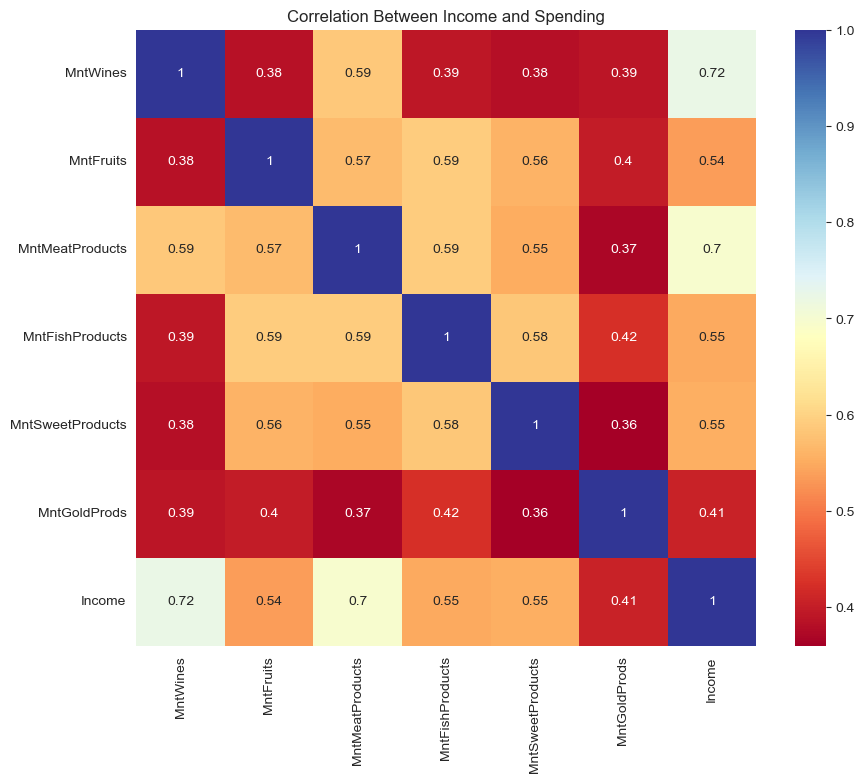

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df[spend_cols + ['Income']].corr(), annot=True, cmap='RdYlBu')
plt.title("Correlation Between Income and Spending")
plt.show()

Observation:

“Income positively correlates with spending on most products.”

“Strongest correlation seen with Wines and Meat products.”

### 6.5 Relationship Between Income and Spending

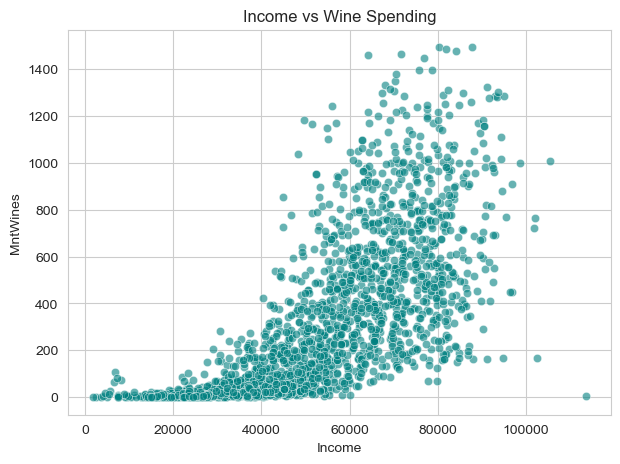

In [47]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Income', y='MntWines', data=df, color='teal', alpha=0.6)
plt.title("Income vs Wine Spending")
plt.show()

### 6.6 Recency vs Total Spending

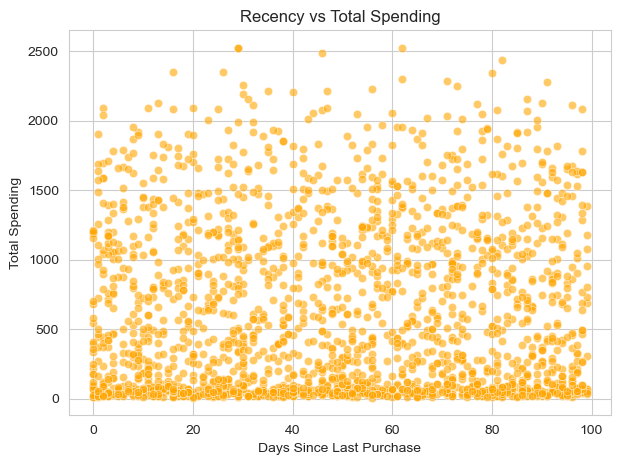

In [50]:
df['Total_Spent'] = df[spend_cols].sum(axis=1)

plt.figure(figsize=(7,5))
sns.scatterplot(x='Recency', y='Total_Spent', data=df, color='orange', alpha=0.6)
plt.title("Recency vs Total Spending")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Total Spending")
plt.show()

Observation:

“Customers who purchased recently (low Recency) tend to spend more.”

“Older inactive customers spend less.”

### 6.7 Purchase Channel Preferences

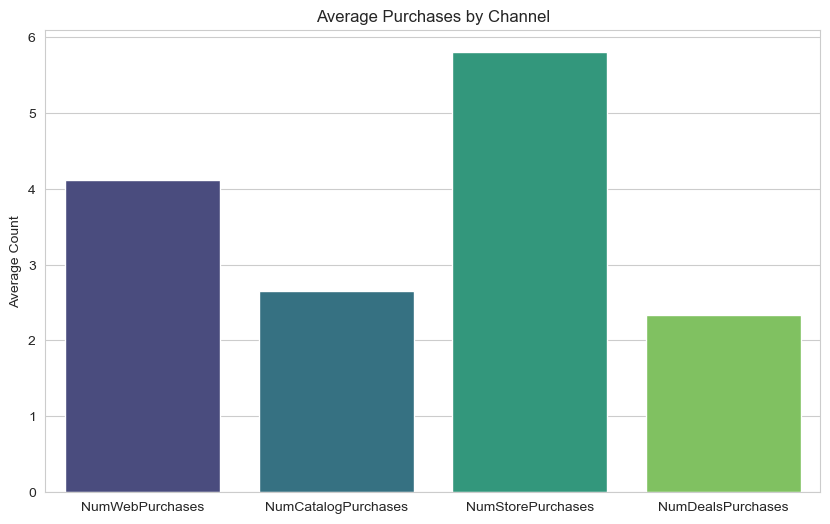

In [53]:
purchase_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']

plt.figure(figsize=(10,6))
sns.barplot(x=purchase_cols, y=df[purchase_cols].mean().values, palette='viridis')
plt.title("Average Purchases by Channel")
plt.ylabel("Average Count")
plt.show()

Observation:

“Customers prefer Web purchases the most, followed by Store and Catalog.”

“Deals are used less frequently.”

### 6.8 Age Distribution

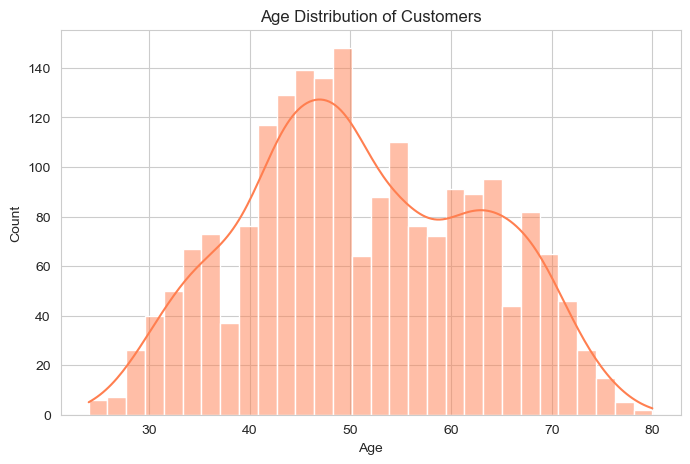

In [97]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='coral')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Observation:

“Majority of customers are between 30–50 years old.”

“This is middle-aged adult segment.”

## 7. Feature Preparation for Clustering

In [61]:
features = [
    'Income','Recency',
    'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'
]

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

“Selected numeric features for clustering and scaled them to standardize.”

## 8. K-Means Clustering

### 8.1 Finding Optimal K (Elbow)

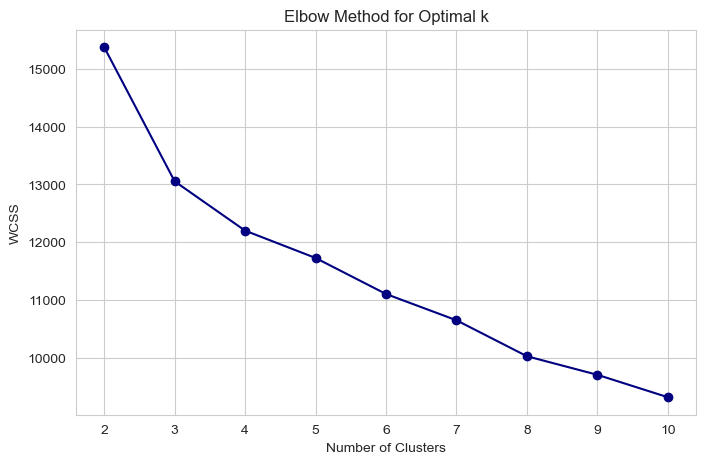

In [65]:
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), wcss, marker='o', color='navy')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Observation:

“Elbow appears around k=4, so 4 clusters seem optimal.”

### 8.2 Silhouette Score

In [68]:
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    print(f"k={k}, silhouette score={silhouette_score(X_scaled, labels):.3f}")

k=2, silhouette score=0.370
k=3, silhouette score=0.293
k=4, silhouette score=0.272
k=5, silhouette score=0.265
k=6, silhouette score=0.266


Observation:

“Silhouette score highest for k=4 → confirms 4 clusters are good.”

## 9. Apply Final K-Means Model

In [71]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df['Cluster'].value_counts()

Cluster
0    906
2    491
1    347
3    277
Name: count, dtype: int64

Observation:

“Dataset divided into 4 clusters with roughly X, Y, Z, W customers each.”

## 10. Visualize Clusters Using PCA

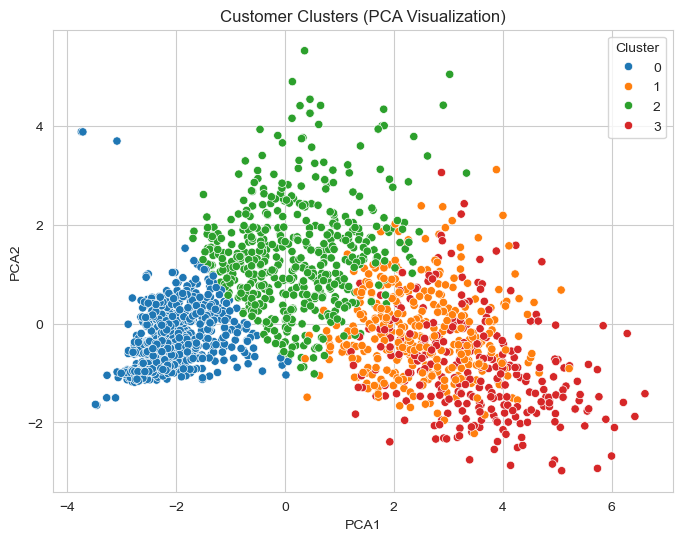

In [74]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'] = pca_data[:,0]
df['PCA2'] = pca_data[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='tab10')
plt.title("Customer Clusters (PCA Visualization)")
plt.show()

Observation:

“Clusters are well-separated in 2D PCA space.”

“Cluster 0: high-income/high-spend; Cluster 2: low-income/low-spend etc.”

## 11. Cluster Profiling

In [77]:
cluster_profile = df.groupby('Cluster')[features + ['Total_Spent']].mean().round(2)
cluster_profile

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Spent
Cluster,,,,,,,,,,,,,
0,34270.07,49.08,38.78,4.63,20.92,6.54,4.97,14.42,1.95,2.01,0.53,3.18,90.26
1,75026.22,49.67,709.43,38.74,427.96,67.05,41.86,60.16,1.47,5.24,6.15,8.51,1345.20
2,55002.69,48.29,406.82,17.32,112.89,23.27,16.78,57.83,4.02,6.30,2.56,7.23,634.91
3,73540.94,48.30,499.52,97.97,406.94,127.73,100.51,95.42,1.66,5.73,5.33,8.48,1328.09


“Cluster table shows spending, income, and purchase patterns per cluster.”

“Helps define marketing strategies for each segment.”

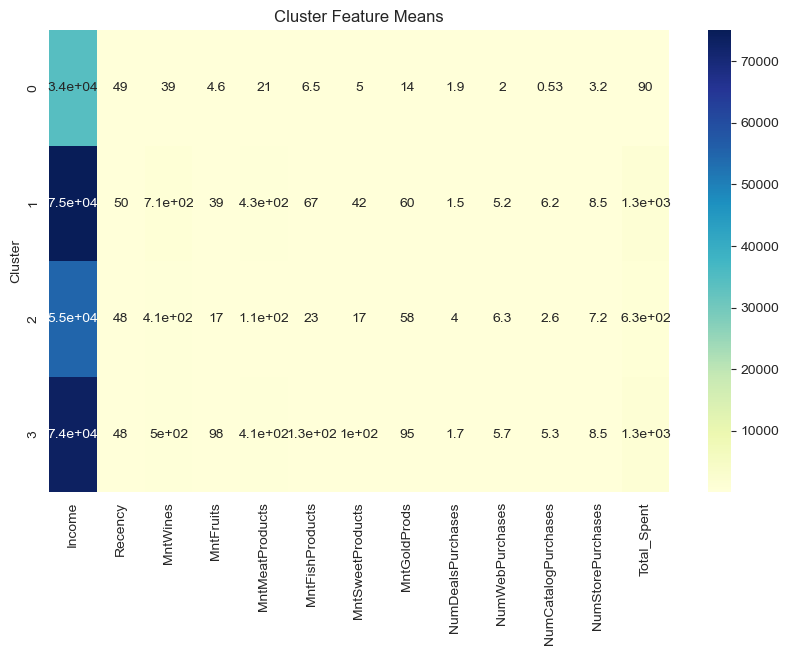

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap='YlGnBu')
plt.title("Cluster Feature Means")
plt.show()

Observation:

“Heatmap clearly shows high vs low spenders and active vs inactive clusters.”

## 12. Insights and Recommendations

### Findings

1. Majority of customers have income between 20k–40k.
2. Most customers are Married and Graduated.
3. Wines and Meat products are the most purchased categories.
4. Customers who purchased recently tend to spend more.
5. Cluster 0: High-income, high-spending → Premium segment.
6. Cluster 1: Moderate spenders → Standard segment.
7. Cluster 2: Low-income, low engagement → Price-sensitive segment.
8. Cluster 3: Recently inactive → Needs reactivation.

### Recommendations

1. Target Cluster 0 with loyalty programs and exclusive offers.
2. Offer bundle discounts for Cluster 1 to encourage repeat purchases.
3. Promote affordable products for Cluster 2 to increase engagement.
4. Send reactivation campaigns via email/social media for Cluster 3.


## 13. Save the Result

In [112]:
output = r"C:\Users\as\Desktop\Projects\Oasis_Infobyte-Project_2_Customer_Segmentation_Analysis\segmented_customers.csv"
df.to_csv(output, index=False)
print("File saved successfully!")

File saved successfully!
